In [3]:
%load_ext autoreload
%autoreload
import pandas as pd
import plotly.express as px
import os
from mappings import shorten_sector_name, expand_sector_name, state_replacer

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
expand_sector_name

<function mappings.expand_sector_name(shortnames)>

In [5]:
df = pd.read_csv(
    "data/imputation/state_sector_data.csv",
)
df.head(2)

,state,sector,state_sector_tot_headcount,state_sector_salary,ds_state_sector_headcount,ds_state_sector_salary,ds_state_sector_pct,ds_state_tot_headcount,ds_state_mdn_salary,ds_sector_salary
0,Alabama,"Agriculture, Forestry, Fishing and Hunting",5800.0,41080.0,NaN,NaN,NaN,NaN,85870.0,NaN
1,Alaska,"Agriculture, Forestry, Fishing and Hunting",210.0,57260.0,NaN,NaN,NaN,150.0,100040.0,NaN


In [6]:
def weighted_average(df, counts, values, groups=None):
    df = df.copy()
    df["weighted"] = df[counts] * df[values]
    if groups is not None:
        g = df.groupby(groups)[["weighted", counts]].sum()

    elif groups is None:
        g = df.sum()

    g[values] = g["weighted"] / g[counts]
    return g[values]


if "ds_sector_salary" not in df.columns:
    sector_median = weighted_average(
        df,
        counts="ds_state_sector_headcount",
        values="ds_state_sector_salary",
        groups="sector",
    )
    sector_median = sector_median.rename("ds_sector_salary")
    df = df.merge(sector_median, left_on="sector", right_index=True)

In [7]:
weighted_average(
    df,
    counts="ds_state_sector_headcount",
    values="ds_state_sector_salary",
    groups="state",
)

state
Alabama                  90407.209302
Alaska                  112181.428571
Arizona                 104125.692308
Arkansas                          NaN
California              127714.948980
Colorado                105450.294118
Connecticut             102878.977273
Delaware                132350.000000
District of Columbia     91812.607261
Florida                  99140.442260
Georgia                 102290.863039
Hawaii                  100400.000000
Idaho                    96240.769231
Illinois                104890.033898
Indiana                  73654.719626
Iowa                     94864.946809
Kansas                   89730.625000
Kentucky                 91699.729730
Louisiana                         NaN
Maine                    99188.219178
Maryland                119644.843750
Massachusetts           110259.219858
Michigan                 90518.661202
Minnesota               111405.723684
Mississippi              49398.181818
Missouri                 76286.935065
Montan

In [8]:
df["in_state_sector_rank"] = df.groupby("state")["ds_state_sector_salary"].rank(
    ascending=False
)
df

,state,sector,state_sector_tot_headcount,state_sector_salary,ds_state_sector_headcount,ds_state_sector_salary,ds_state_sector_pct,ds_state_tot_headcount,ds_state_mdn_salary,ds_sector_salary,in_state_sector_rank
0,Alabama,"Agriculture, Forestry, Fishing and Hunting",5800.0,41080.0,NaN,NaN,NaN,NaN,85870.0,NaN,NaN
1,Alaska,"Agriculture, Forestry, Fishing and Hunting",210.0,57260.0,NaN,NaN,NaN,150.0,100040.0,NaN,NaN
2,Arizona,"Agriculture, Forestry, Fishing and Hunting",9840.0,30080.0,NaN,NaN,NaN,2860.0,102770.0,NaN,NaN
3,Arkansas,"Agriculture, Forestry, Fishing and Hunting",4120.0,37920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"Agriculture, Forestry, Fishing and Hunting",239210.0,33540.0,NaN,NaN,NaN,29420.0,126810.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1004,Virginia,"Federal, State, and Local Government, excludin...",357640.0,65750.0,50.0,84680.0,0.01,4500.0,132400.0,79426.827309,9.0
1005,Washington,"Federal, State, and Local Government, excludin...",258360.0,77760.0,NaN,NaN,NaN,4160.0,135850.0,79426.827309,NaN
1006,West Virginia,"Federal, State, and Local Government, excludin...",76640.0,43590.0,40.0,64690.0,0.05,70.0,67010.0,79426.827309,1.0
1007,Wisconsin,"Federal, State, and Local Government, excludin...",160490.0,54890.0,NaN,NaN,NaN,2740.0,95410.0,79426.827309,NaN


In [9]:
df["sector_salary_rank"] = df.groupby(["state"])["state_sector_salary"].transform(
    lambda x: x.rank(ascending=False)
)
df["ds_sector_salary_rank"] = df.groupby(["state"])["ds_state_sector_salary"].transform(
    lambda x: x.rank(ascending=False)
)
df["short_sector"] = shorten_sector_name(df.sector)

Text(0.5, 1.0, 'Data Science Salary by State and Sector')

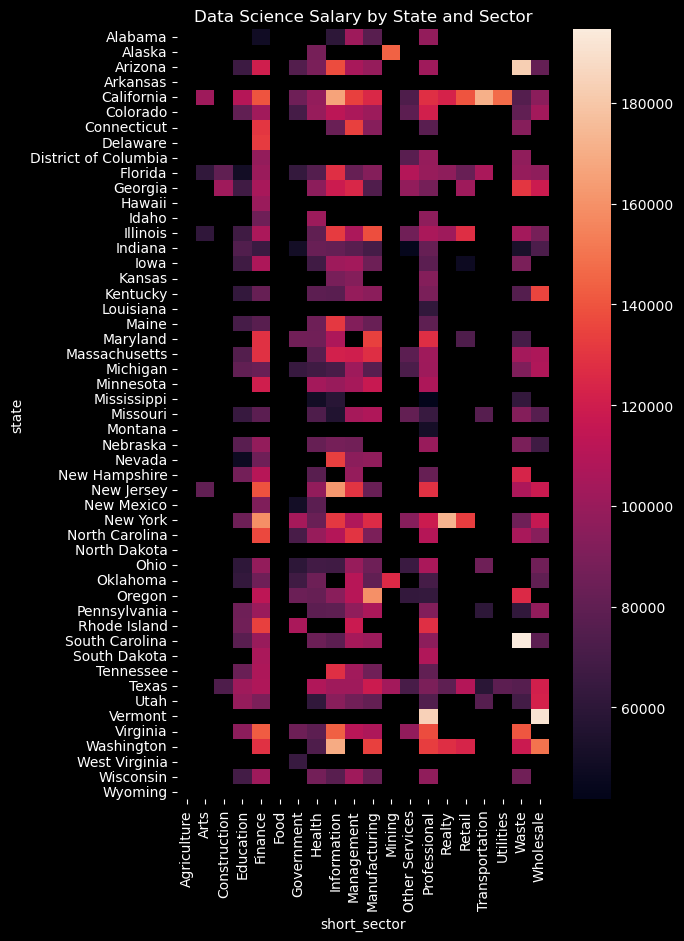

In [10]:
ds_salary_pivot = df.pivot(
    index="state", columns="short_sector", values="ds_state_sector_salary"
)
plt.subplots(figsize=(6, 10))
sns.heatmap(ds_salary_pivot)
plt.title("Data Science Salary by State and Sector")

* state
* sector
* state_sector_tot_headcount
* state_sector_salary
* ds_state_sector_headcount
* ds_state_sector_salary
* ds_state_sector_pct
* ds_state_tot_headcount
* ds_state_mdn_salary
* sector_salary_rank
* ds_sector_salary_rank
* short_sector

In [11]:
top_sectors = df[df["in_state_sector_rank"] == 1]
top_sectors["fips"] = state_replacer(
    top_sectors["state"], in_fmt="long", out_fmt="fips"
)
top_sectors["st"] = state_replacer(top_sectors["state"], in_fmt="long", out_fmt="short")

/tmp/ipykernel_2761471/3213452170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sectors["fips"] = state_replacer(
/tmp/ipykernel_2761471/3213452170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sectors["st"] = state_replacer(top_sectors["state"], in_fmt="long", out_fmt="short")


In [12]:
df.columns

Index(['state', 'sector', 'state_sector_tot_headcount', 'state_sector_salary',
       'ds_state_sector_headcount', 'ds_state_sector_salary',
       'ds_state_sector_pct', 'ds_state_tot_headcount', 'ds_state_mdn_salary',
       'ds_sector_salary', 'in_state_sector_rank', 'sector_salary_rank',
       'ds_sector_salary_rank', 'short_sector'],
      dtype='object')

In [18]:
# Create a choropleth map with state names
fig = px.choropleth(
    top_sectors,
    locations="st",  # Column with state names
    locationmode="USA-states",  # Set location mode for U.S. states
    color="ds_state_mdn_salary",  # Column with data to visualize
    scope="usa",  # Restrict to the U.S.

    title="Highest Paying Sector by State",  # Title for the map
    color_continuous_scale="Viridis",  # Color scale
    # labels={"value": "Value"},  # Label for the legend
)
fig.update_coloraxes(dict(colorbar=dict(title="Annual Salary", )))
fig.add_scattergeo(
    locations=top_sectors["st"],
    locationmode="USA-states",
    text=top_sectors["short_sector"],
    mode="text",
)
# Display the map
fig.show()

In [ ]:
# Save the figure as an HTML file
fig.write_html("choropleth_map.html")

# To open the file in a browser, you can use your system's default file explorer


os.system("open choropleth_map.html")

[2760215:2760243:0421/164828.281438:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[2760215:2760243:0421/164828.281640:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[2760215:2760243:0421/164828.281710:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[2760215:2760243:0421/164828.281770:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[2760215:2760243:0421/164828.318933:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[2760215:2760243:0421/164828.319085:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[2760215:2760239:0421/164828.357395:ERROR:bus.

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
[2760215:2760243:0421/164838.487623:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[2760215:2760243:0421/164838.487730:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
